# Reading the dataset & Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df=pd.read_csv('city_day.csv')

In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Data Processing

In [3]:
pd.isnull(df).sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
# Drop pollutants with more than 60% missing values
threshold = 0.6 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [5]:
# Interpolate numerical columns
for col in ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'AQI']:
    df[col] = df[col].interpolate(method='linear')

# Drop remaining null rows
df = df.dropna()

In [6]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Visualizations
## Correlation Between PM2.5 and PM10 Concentrations

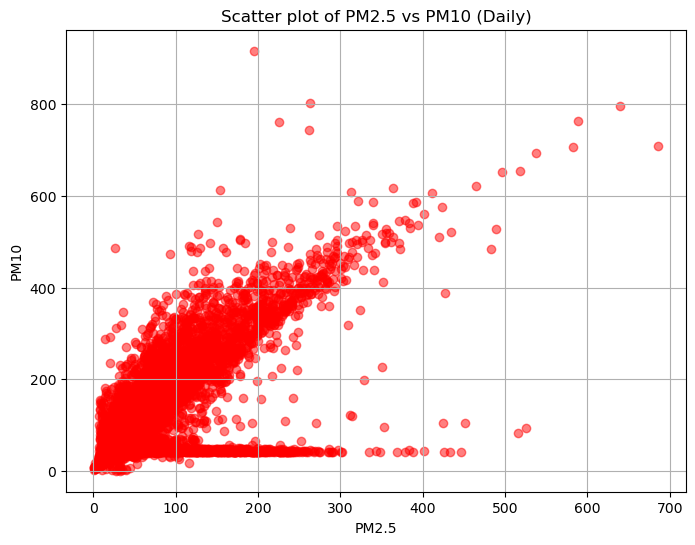

In [7]:
import matplotlib.pyplot as plt

# Plot PM2.5 vs PM10
plt.figure(figsize=(8,6))
plt.scatter(df['PM2.5'], df['PM10'], alpha=0.5, c='red')
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.title("Scatter plot of PM2.5 vs PM10 (Daily)")
plt.grid(True)
plt.show()

## Daily PM2.5 Levels in Major Indian Cities (2015–2020)


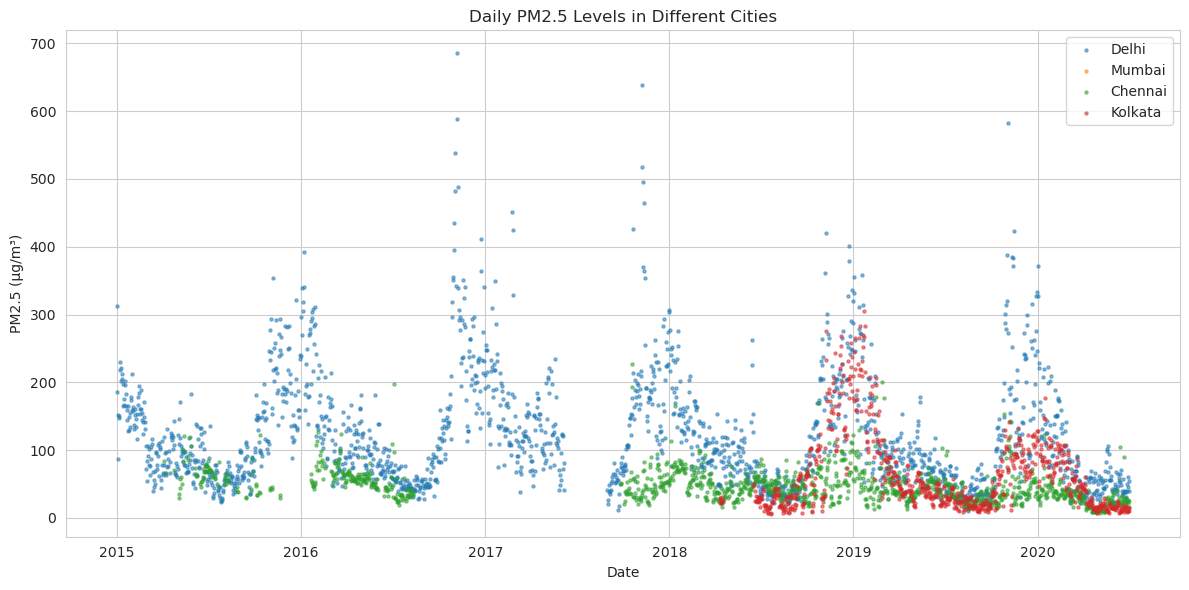

In [8]:
sns.set_style("whitegrid")

cities = ['Delhi', 'Mumbai', 'Chennai','Kolkata']
plt.figure(figsize=(12, 6))
for city in cities:
    temp = df[df['City'] == city]
    plt.scatter(temp['Date'], temp['PM2.5'], label=city, s=5, alpha=0.5)
    
plt.legend()
plt.title("Daily PM2.5 Levels in Different Cities")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()

## PM2.5 Levels Over Time Colored by AQI

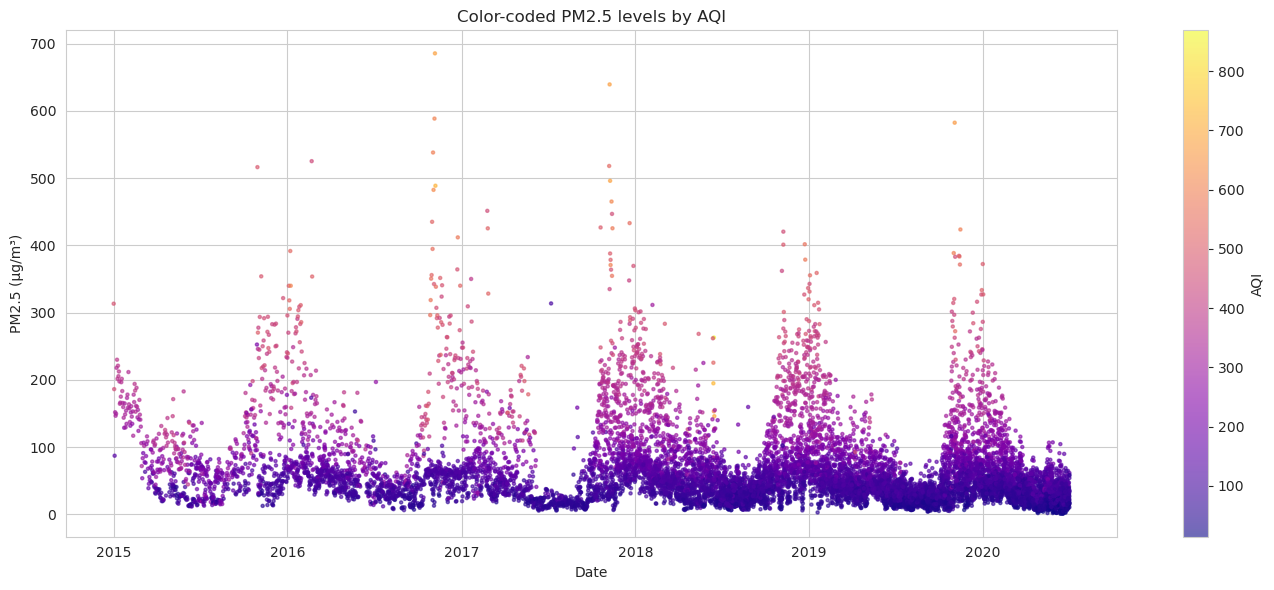

In [9]:
# Plot
plt.figure(figsize=(14, 6))
plt.scatter(df['Date'], df['PM2.5'], c=df['AQI'],
            cmap='plasma', s=5, alpha=0.6)

plt.colorbar(label='AQI')
plt.title("Color-coded PM2.5 levels by AQI")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

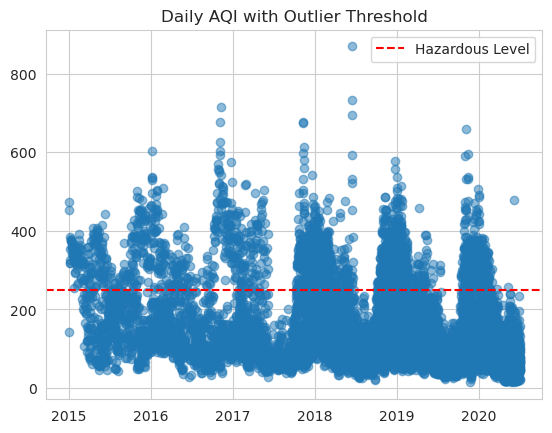

In [10]:
plt.scatter(df['Date'], df['AQI'], alpha=0.5)
plt.axhline(y=250, color='red', linestyle='--', label='Hazardous Level')
plt.title("Daily AQI with Outlier Threshold")
plt.legend()
plt.show()

# Monthly Average of Air Pollutants by City

In [11]:
# Create a new 'month' column
df['month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
              'O3', 'Benzene', 'Toluene', 'NH3', 'AQI']

# Group by city and month, take mean
monthly_df = df.groupby(['City', 'month'])[pollutants].mean().reset_index()
monthly_df

,City,month,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,NH3,AQI
0,Aizawl,2020-03-01,39.256500,47.453000,3.938500,0.719000,5.469500,0.451500,5.892000,6.155000,6.432000,6.875000,25.669500,65.350000
1,Aizawl,2020-04-01,22.208571,28.872143,7.769286,0.298214,10.394643,0.297500,6.835000,5.241429,5.441071,5.835357,22.285000,40.678571
2,Aizawl,2020-05-01,11.849286,16.608214,11.749643,0.376786,15.838214,0.280714,9.249643,1.773929,9.963214,10.576429,19.499643,24.642857
3,Aizawl,2020-06-01,3.721786,11.376429,12.432143,0.350000,16.360000,0.187857,7.535000,2.872857,21.330714,21.541429,22.550000,21.142857
4,Amaravati,2017-11-01,75.821667,120.445000,3.630000,24.798333,16.140000,0.123333,19.901667,120.391667,0.208333,5.888333,11.421667,184.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Visakhapatnam,2020-02-01,45.494286,96.208571,5.660714,34.969286,23.035714,1.030714,6.470714,29.708571,4.043929,10.878214,11.840714,97.750000
492,Visakhapatnam,2020-03-01,28.495185,76.370000,5.212593,29.281481,19.546667,0.708148,9.247407,22.317037,3.652593,10.784815,10.871111,83.814815
493,Visakhapatnam,2020-04-01,16.872222,54.366296,11.699259,28.332593,24.483333,0.110000,6.669630,14.982593,2.587037,6.968519,7.442963,55.000000
494,Visakhapatnam,2020-05-01,17.795806,68.667419,2.625806,22.331613,13.619032,0.196774,8.274839,21.938065,2.387419,6.287742,9.809677,64.903226


## Comparison of AQI and PM2.5 Levels in Delhi Over Time

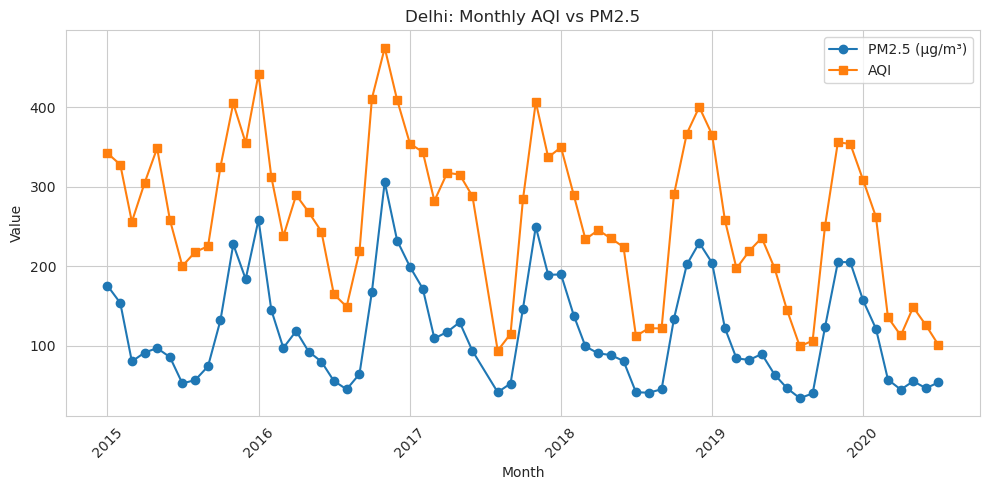

In [16]:
delhi_df = monthly_df[monthly_df['City'] == 'Delhi']

# Plot both AQI and PM2.5
plt.figure(figsize=(10, 5))
plt.plot(delhi_df['month'], delhi_df['PM2.5'], label='PM2.5 (µg/m³)', marker='o')
plt.plot(delhi_df['month'], delhi_df['AQI'], label='AQI', marker='s')

plt.title("Delhi: Monthly AQI vs PM2.5")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

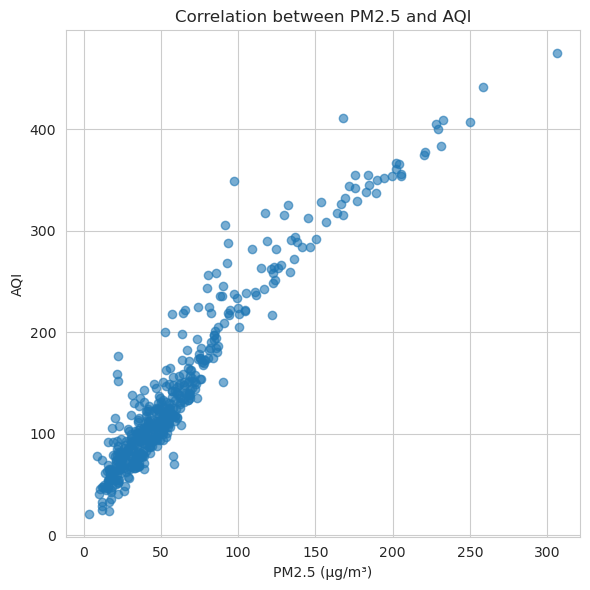

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(monthly_df['PM2.5'], monthly_df['AQI'], alpha=0.6)
plt.title("Correlation between PM2.5 and AQI")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

## City-wise Analysis of Pollution Trends in India


In [49]:
def max_polluted_city(pollutant):
    city_avg = monthly_df.groupby('City')[pollutant].mean().sort_values(ascending=False).head(5)
    return city_avg.reset_index().rename(columns={pollutant: f'Average {pollutant}'})

pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
AQI= max_polluted_city('AQI')

print("Top 5 Cities with Highest Average PM2.5:")
print(pm2_5)
print("\nTop 5 Cities with Highest Average PM10:")
print(pm10)
print("\nTop 5 Cities with Highest Average NO2:")
print(no2)
print("\nTop 5 Cities with Highest Average SO2:")
print(so2)
print("\nTop 5 Cities with Highest Average CO:")
print(co)
print("\nTop 5 Cities with Highest Average AQI:")
print(AQI)

Top 5 Cities with Highest Average PM2.5:
      City  Average PM2.5
0    Delhi     118.152211
1  Lucknow     107.577250
2  Talcher      74.104321
3    Patna      71.590236
4  Kolkata      61.026621

Top 5 Cities with Highest Average PM10:
       City  Average PM10
0     Delhi    230.930580
1   Talcher    163.831110
2    Jaipur    125.678425
3  Gurugram    125.061230
4     Patna    124.931771

Top 5 Cities with Highest Average NO2:
            City  Average NO2
0          Delhi    50.977939
1        Kolkata    39.416471
2        Lucknow    37.531559
3  Visakhapatnam    35.872819
4          Patna    33.746331

Top 5 Cities with Highest Average SO2:
            City  Average SO2
0        Talcher    42.729732
1          Delhi    15.610829
2      Amaravati    14.117845
3  Visakhapatnam    12.589727
4         Jaipur    11.165200

Top 5 Cities with Highest Average CO:
        City  Average CO
0    Talcher    2.151102
1  Bengaluru    2.082677
2      Delhi    2.016940
3    Chennai    1.219951
4 

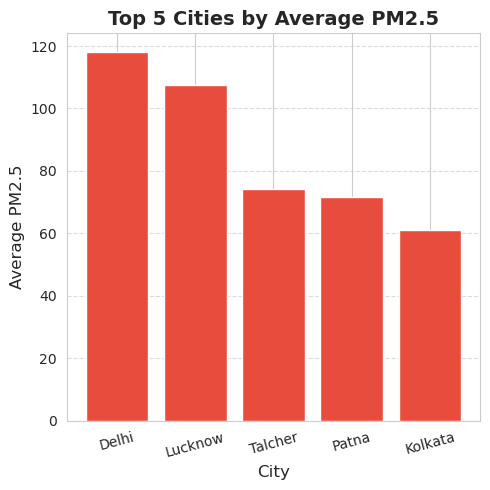

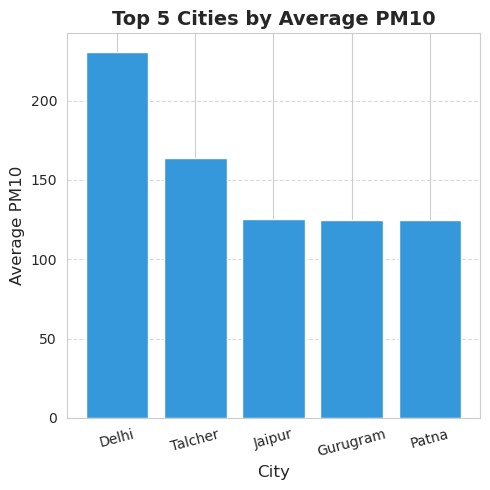

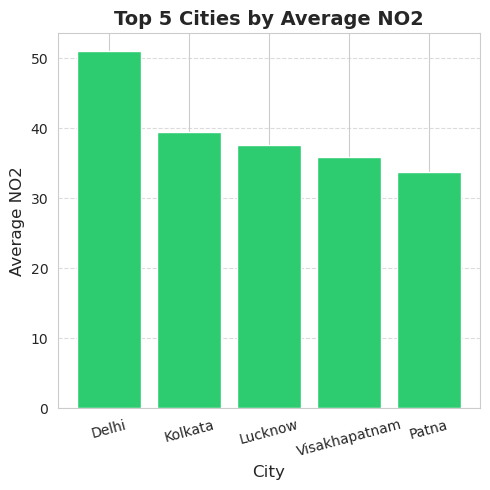

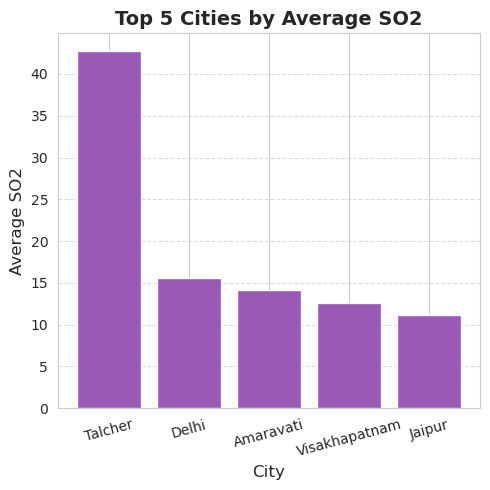

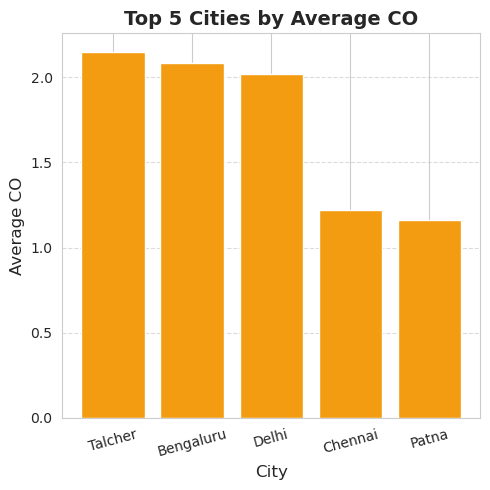

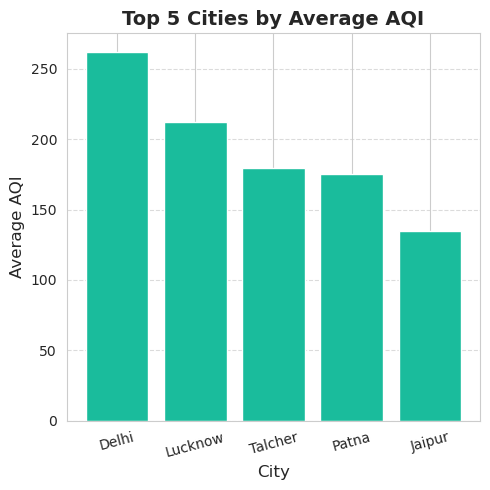

In [65]:
colors = {
    'PM2.5': '#E74C3C',   
    'PM10': '#3498DB',   
    'NO2': '#2ECC71',    
    'SO2': '#9B59B6',     
    'CO': '#F39C12',     
    'AQI': '#1ABC9C'      
}

def plot_top_polluted(df, pollutant):
    plt.figure(figsize=(5, 5))
    plt.bar(df['City'], df[f'Average {pollutant}'], color=colors[pollutant])
    plt.title(f'Top 5 Cities by Average {pollutant}', fontsize=14, fontweight='bold')
    plt.xlabel('City', fontsize=12)
    plt.ylabel(f'Average {pollutant}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

# Plot for each pollutant
plot_top_polluted(pm2_5, 'PM2.5')
plot_top_polluted(pm10, 'PM10')
plot_top_polluted(no2, 'NO2')
plot_top_polluted(so2, 'SO2')
plot_top_polluted(co, 'CO')
plot_top_polluted(AQI, 'AQI')


## Overall Pollution Load Across Cities


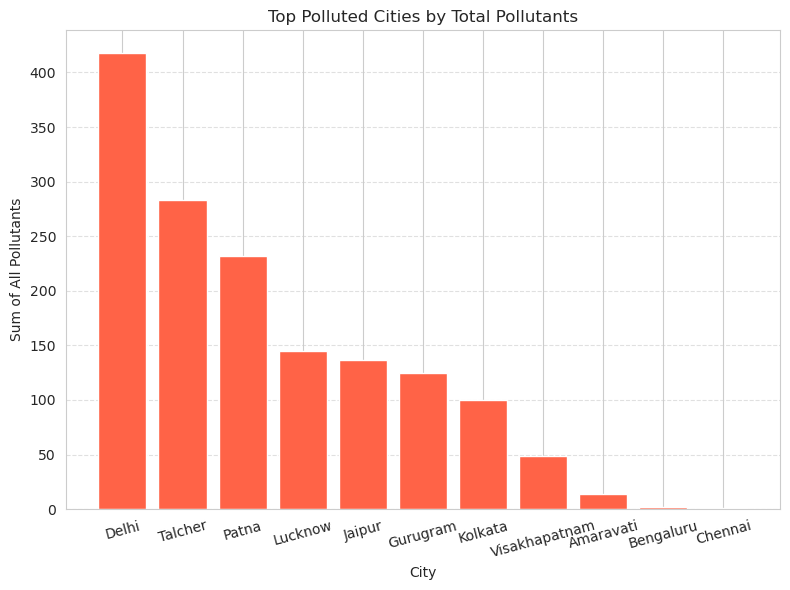

In [81]:
all_top = pd.concat([pm2_5, pm10, no2, so2, co,])
total_pollution = all_top.groupby('City').sum(numeric_only=True)
total_pollution['Total'] = total_pollution.sum(axis=1)
total_pollution = total_pollution.sort_values(by='Total', ascending=False)

plt.figure(figsize=(8,6))
plt.bar(total_pollution.index, total_pollution['Total'], color='tomato')
plt.title("Top Polluted Cities by Total Pollutants")
plt.xlabel("City")
plt.ylabel("Sum of All Pollutants")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [82]:
# Show average pollution levels and spread across India 
monthly_df.describe()


,month,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,NH3,AQI
count,496,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,2018-08-17 17:28:03.870967808,60.255791,106.643348,16.340870,30.046672,31.630008,1.149327,10.602650,35.969724,3.841349,8.155984,25.764951,138.482168
min,2015-01-01 00:00:00,3.721786,4.850000,0.540000,0.253824,0.000000,0.000000,1.588000,1.773929,0.000000,0.000000,0.120000,21.142857
25%,2017-11-01 00:00:00,31.849781,54.338109,6.436855,15.831613,15.952226,0.605730,6.270241,24.978629,0.561452,1.661855,11.743417,81.517137
50%,2018-12-01 00:00:00,47.362542,90.782194,10.414043,27.743220,25.191937,0.846601,9.099310,32.415484,1.929488,4.457667,20.458054,112.435484
75%,2019-11-01 00:00:00,68.673292,128.861073,18.534274,41.558468,38.546756,1.182602,12.812301,45.025000,3.998707,10.043468,33.625091,158.398317
max,2020-07-01 00:00:00,306.019000,452.150667,119.304667,112.662333,182.094839,19.734000,59.838750,120.391667,221.820645,221.741613,207.950000,474.833333
std,NaN,46.373167,74.860351,17.107333,18.221468,25.370907,1.641043,7.003117,17.277294,11.663933,13.892885,22.500977,84.225259


In [ ]:
#Save Final Dataset
monthly_df.to_csv('monthly_aqi_data.csv',index=False)

# Summary and Conclusions

- The analysis reveals that several Indian cities consistently record high pollution levels, with Delhi, Ghaziabad, and Kanpur among the worst affected.
- PM2.5 and PM10 levels show a clear spike during the Diwali season, especially in northern cities like Delhi.
- Talcher, although less discussed publicly, shows alarmingly high AQI levels due to industrial activity.
- Overall, the data indicates a serious air quality crisis that fluctuates seasonally and varies significantly by region.
- These insights highlight the urgent need for targeted pollution control measures, especially around festival periods and in high-risk zo.

📌 A more detailed explanation and policy implications are discussed in the [README](README.md).

